In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn-whitegrid')

In [3]:
# Open the data
data = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

## Part: List the first few lines

In [4]:
data.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


## Part: See if there are any missing values in the data (However, you don't have to do anything about them now)

In [5]:
data.isnull().sum()

number                     0
gender                     0
age                        0
family                     0
education                  1
years_of_service           2
salary                     0
sat_management             0
sat_colleques              1
sat_workingEnvironment     0
sat_salary                 0
sat_tasks                  0
healtcare                 35
holidayCabin              62
gym                       73
muscleCare                60
dtype: int64

## Part: (Re)name the columns according to the explanations found in the Excel file

In [6]:
data.columns = ['number', 'gender', 'age', 'family', 'education', 'years_of_service', 'salary', 'sat_management', 'sat_colleques', 'sat_workingEnvironment', 'sat_salary', 'sat_tasks', 'healthcare', 'holidayCabin', 'gym', 'muscleCare']

In [7]:
data.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healthcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


## Part: If necessary, delete any columns that you think are unnecessary

In [8]:
data=data.drop(['number'], axis=1)

In [9]:
data.head()

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healthcare,holidayCabin,gym,muscleCare
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


sat environment


In [100]:
data8=pd.crosstab(data['sat_workingEnvironment'], 'Count')

In [101]:
data8

col_0,Count
sat_workingEnvironment,
1,9
2,9
3,30
4,23
5,11


In [102]:
data8.index=['Very unsatisfied','Unsatisfied','Neutral','Satisfied', 'Very satisfied']
data8

col_0,Count
Very unsatisfied,9
Unsatisfied,9
Neutral,30
Satisfied,23
Very satisfied,11


In [103]:
data8.columns.name='Satisfaction with working environment'

In [104]:
data8

Satisfaction with working environment,Count
Very unsatisfied,9
Unsatisfied,9
Neutral,30
Satisfied,23
Very satisfied,11


## Part: Draw a graphs based on the frequency tables

<AxesSubplot:>

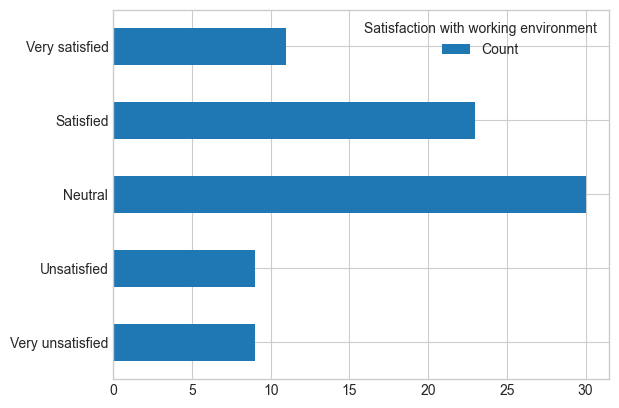

In [105]:
data8.plot.barh()

Text(0.5, 0, 'Count')

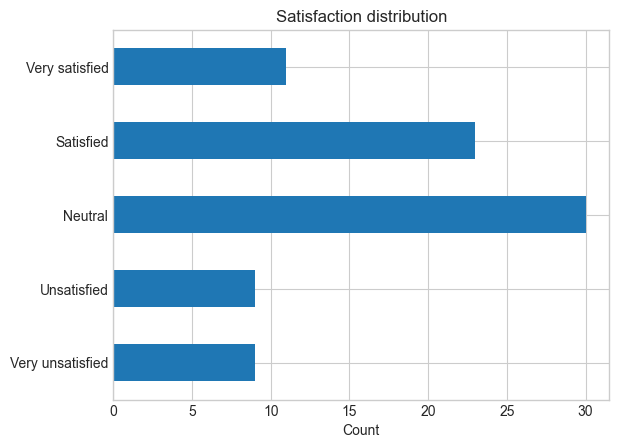

In [106]:
data8.plot.barh(legend = False)

plt.title('Satisfaction distribution')
plt.xlabel('Count')

In [107]:
sum(data8['Count'])

82

Text(0.5, 0, 'Count, N=102')

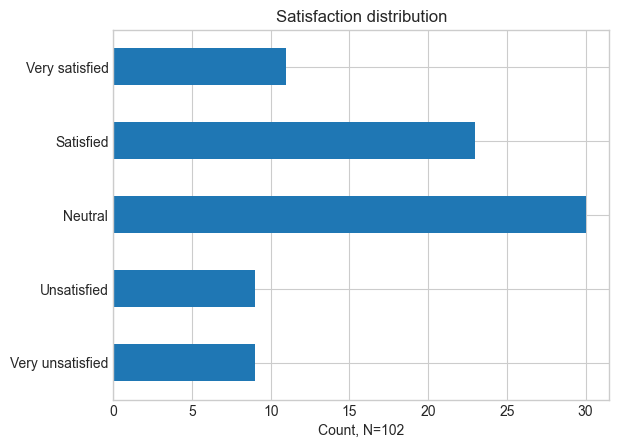

In [112]:
data8.plot.barh(legend = False)

plt.title('Satisfaction distribution')
plt.xlabel('Count, N=102')

## Part: Instead of using frequencies, use percentages

In [123]:
data9 = pd.crosstab(data['sat_workingEnvironment'], 'Count')
data9['%'] = data9['Count'] / data9['Count'].sum() * 100
data9.index = ['Very unsatisfied','Unsatisfied','Neutral','Satisfied', 'Very satisfied']
data9.columns.name = 'Satisfaction with working environment'
data9


Satisfaction with working environment,Count,%
Very unsatisfied,9,10.975610
Unsatisfied,9,10.975610
Neutral,30,36.585366
Satisfied,23,28.048780
Very satisfied,11,13.414634


In [124]:
data9.style.format({'Count': '{:.0f}', '%': '{:.1f} %'})

Satisfaction with working environment,Count,%
Very unsatisfied,9,11.0 %
Unsatisfied,9,11.0 %
Neutral,30,36.6 %
Satisfied,23,28.0 %
Very satisfied,11,13.4 %


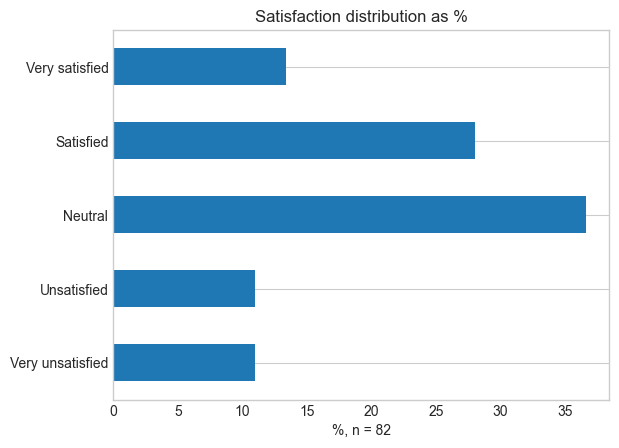

In [145]:
data9['%'].plot.barh(zorder = 2)

plt.title('Satisfaction distribution as %')

plt.xlabel('%, n = ' + str(data9['Count'].sum()))

plt.grid(axis = 'x')
plt.tick_params(axis = 'y', length = 0)

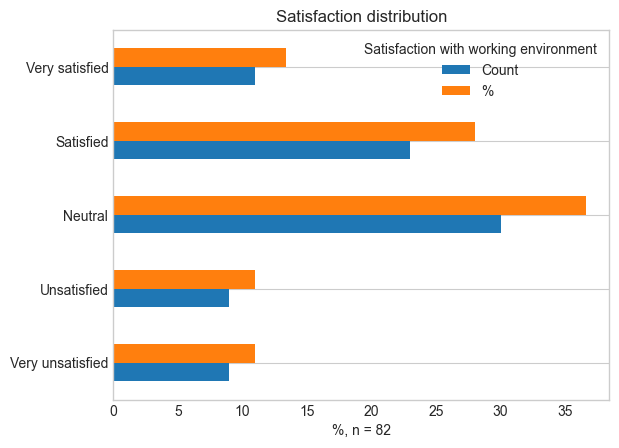

In [146]:
data9.plot.barh(zorder = 2)

plt.title('Satisfaction distribution')

plt.xlabel('%, n = ' + str(data9['Count'].sum()))

plt.grid(axis = 'x')
plt.tick_params(axis = 'y', length = 0)

sat management

In [128]:
data10=pd.crosstab(data['sat_management'], 'Count')

In [129]:
data10

col_0,Count
sat_management,
1,7
2,16
3,30
4,23
5,6


In [130]:
data10.index=['Very unsatisfied','Unsatisfied','Neutral','Satisfied', 'Very satisfied']
data10

col_0,Count
Very unsatisfied,7
Unsatisfied,16
Neutral,30
Satisfied,23
Very satisfied,6


In [131]:
data10.columns.name='Satisfaction with management'

In [132]:
data10

Satisfaction with management,Count
Very unsatisfied,7
Unsatisfied,16
Neutral,30
Satisfied,23
Very satisfied,6


<AxesSubplot:>

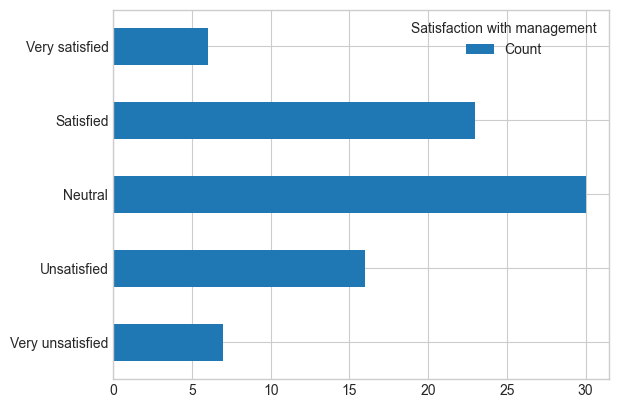

In [133]:
data10.plot.barh()

Text(0.5, 0, 'Count')

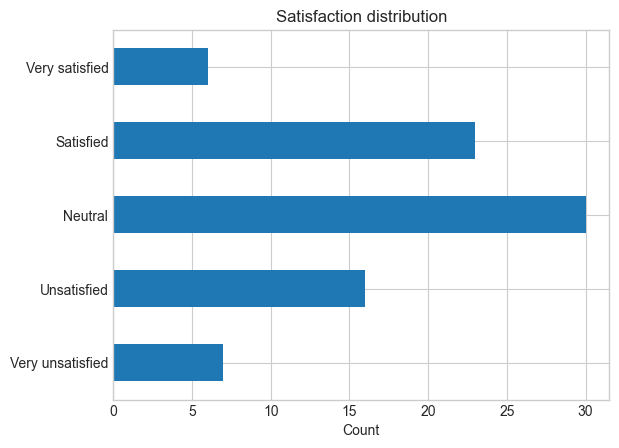

In [134]:
data10.plot.barh(legend = False)

plt.title('Satisfaction distribution')
plt.xlabel('Count')

In [135]:
sum(data10['Count'])

82

Text(0.5, 0, 'Count, N=102')

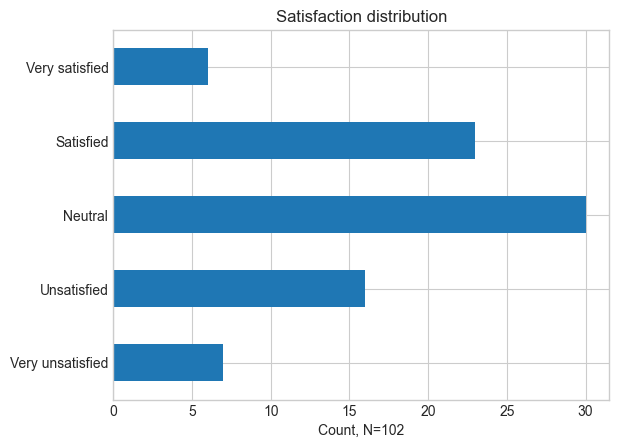

In [136]:
data10.plot.barh(legend = False)

plt.title('Satisfaction distribution')
plt.xlabel('Count, N=102')

In [137]:
data10 = pd.crosstab(data['sat_management'], 'Count')
data10['%'] = data10['Count'] / data10['Count'].sum() * 100
data10.index = ['Very unsatisfied','Unsatisfied','Neutral','Satisfied', 'Very satisfied']
data10.columns.name = 'Satisfaction with management'
data10

Satisfaction with management,Count,%
Very unsatisfied,7,8.536585
Unsatisfied,16,19.512195
Neutral,30,36.585366
Satisfied,23,28.048780
Very satisfied,6,7.317073


In [138]:
data10.style.format({'Count': '{:.0f}', '%': '{:.1f} %'})

Satisfaction with management,Count,%
Very unsatisfied,7,8.5 %
Unsatisfied,16,19.5 %
Neutral,30,36.6 %
Satisfied,23,28.0 %
Very satisfied,6,7.3 %


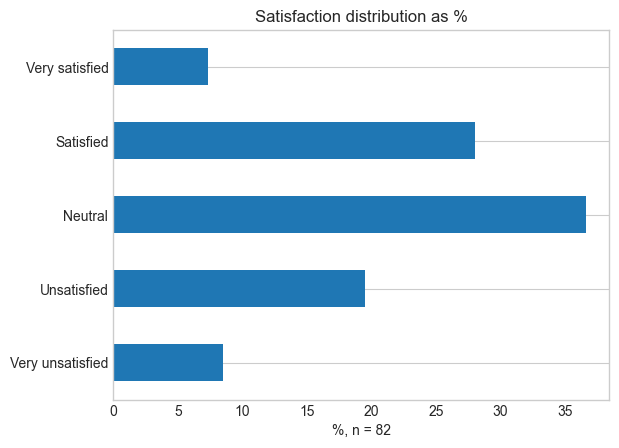

In [139]:
data10['%'].plot.barh(zorder = 2)

plt.title('Satisfaction distribution as %')

plt.xlabel('%, n = ' + str(data10['Count'].sum()))

plt.grid(axis = 'x')
plt.tick_params(axis = 'y', length = 0)

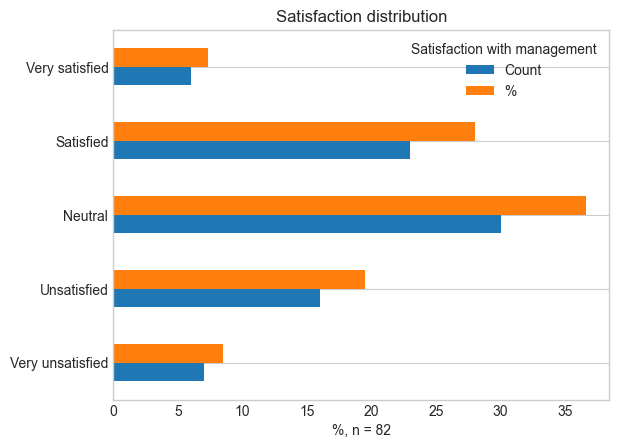

In [140]:
data10.plot.barh(zorder = 2)

plt.title('Satisfaction distribution')

plt.xlabel('%, n = ' + str(data10['Count'].sum()))

plt.grid(axis = 'x')
plt.tick_params(axis = 'y', length = 0)

age

In [10]:
min(data['age'])

20

In [11]:
max(data['age'])

61

In [23]:
bins = [15, 30, 40, 50, 60, 65]

In [24]:
data['age_class'] = pd.cut(data['age'], bins = bins)

In [25]:
data

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healthcare,holidayCabin,gym,muscleCare,age_class
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN,"(30, 40]"
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN,"(15, 30]"
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN,"(15, 30]"
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN,"(30, 40]"
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN,"(15, 30]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN,"(15, 30]"
78,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN,"(30, 40]"
79,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN,"(15, 30]"
80,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN,"(30, 40]"


In [26]:
data3 = pd.crosstab(data['age_class'], 'Count')

data3.columns.name = 'Age'

# Percentages
n = data3['Count'].sum()
data3['%'] = data3 / n * 100

In [27]:
data3

Age,Count,%
age_class,,
"(15, 30]",20,24.390244
"(30, 40]",35,42.682927
"(40, 50]",16,19.512195
"(50, 60]",10,12.195122
"(60, 65]",1,1.219512


In [28]:
type(data3.index.values[0])

pandas._libs.interval.Interval

In [29]:
# Note, that income column has now values of type Interval!
# We would like to add row "Total" into the index, but the Index can contain only one type of values
# for that reason we need to change the type of index elements to be string!

data3.index = data3.index.astype(str)
data3.loc['Total'] = data3.sum()
data3

Age,Count,%
age_class,,
"(15, 30]",20.0,24.390244
"(30, 40]",35.0,42.682927
"(40, 50]",16.0,19.512195
"(50, 60]",10.0,12.195122
"(60, 65]",1.0,1.219512
Total,82.0,100.000000


In [30]:
type(data3.index.values[0])

str

In [31]:
# Finalizing the layout
data3.style.format({'Count': '{:.0f}', '%': '{:.1f} %'})

Age,Count,%
age_class,,
"(15, 30]",20,24.4 %
"(30, 40]",35,42.7 %
"(40, 50]",16,19.5 %
"(50, 60]",10,12.2 %
"(60, 65]",1,1.2 %
Total,82,100.0 %


Text(0, 0.5, 'Count, n=82')

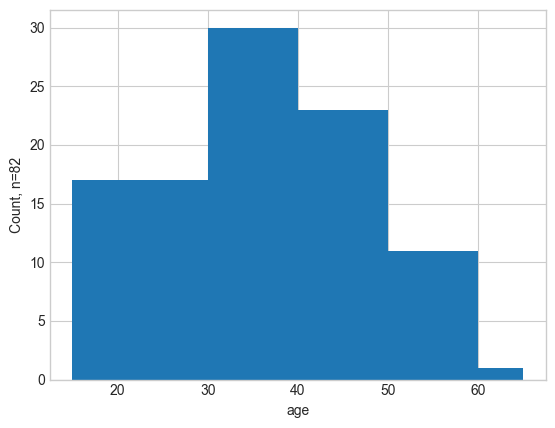

In [34]:
data['age'].hist(bins = bins)

plt.xlabel('age')
plt.ylabel('Count, n=' + str(n))

- Then let's cover percentages

Text(0, 0.5, '%, n=82')

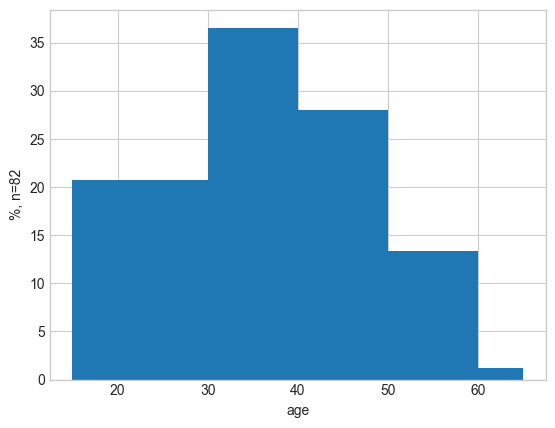

In [35]:
data['age'].hist(bins = bins, weights = np.ones(n) / n * 100)

plt.xlabel('age')
plt.ylabel('%, n=' + str(n))

cross tabulation sat working environment and age


In [86]:
data4 = pd.crosstab(data['sat_workingEnvironment'], data['age_class'])
data4.index = ['Very unsatisfied','Unsatisfied','Neutral','Satisfied', 'Very satisfied']
data4.columns.name = 'Age groups'


In [87]:
data4

Age groups,"(15, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 65]"
Very unsatisfied,1,6,2,0,0
Unsatisfied,4,1,1,2,1
Neutral,11,12,4,3,0
Satisfied,3,10,7,3,0
Very satisfied,1,6,2,2,0


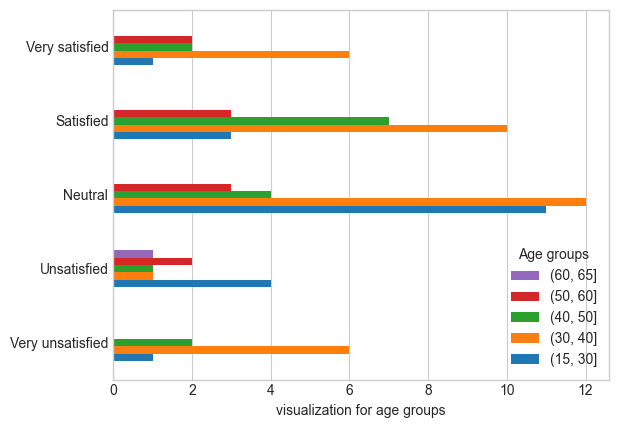

In [88]:
data4.plot.barh(legend = 'reverse')

plt.xlabel('visualization for age groups')

plt.grid(axis = 'y')

In [89]:
data4 = pd.crosstab(data['sat_workingEnvironment'], data['age_class'], normalize = 'columns') * 100
data4.index = ['Very unsatisfied','Unsatisfied','Neutral','Satisfied', 'Very satisfied']
data4.columns.name = 'Age groups'

In [90]:
data4

Age groups,"(15, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 65]"
Very unsatisfied,5.0,17.142857,12.50,0.0,0.0
Unsatisfied,20.0,2.857143,6.25,20.0,100.0
Neutral,55.0,34.285714,25.00,30.0,0.0
Satisfied,15.0,28.571429,43.75,30.0,0.0
Very satisfied,5.0,17.142857,12.50,20.0,0.0


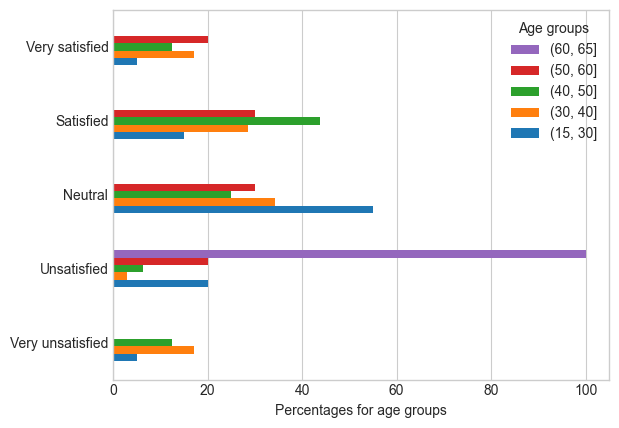

In [91]:
data4.plot.barh(legend = 'reverse')

plt.xlabel('Percentages for age groups')

plt.grid(axis = 'y')

SCIPY

In [94]:
data6 = pd.crosstab(data['sat_workingEnvironment'], data['age_class'])
data6.index = ['Very unsatisfied','Unsatisfied','Neutral','Satisfied', 'Very satisfied']

In [95]:
from scipy.stats import chi2_contingency


chi2_contingency(data6)

(22.758253968253964,
 0.1203513564884276,
 16,
 array([[ 2.19512195,  3.84146341,  1.75609756,  1.09756098,  0.1097561 ],
        [ 2.19512195,  3.84146341,  1.75609756,  1.09756098,  0.1097561 ],
        [ 7.31707317, 12.80487805,  5.85365854,  3.65853659,  0.36585366],
        [ 5.6097561 ,  9.81707317,  4.48780488,  2.80487805,  0.2804878 ],
        [ 2.68292683,  4.69512195,  2.14634146,  1.34146341,  0.13414634]]))

## Interpretation

Since the p-value is 0.85 it is not small enough to state the there would be some dependency in education levels and genders.